In [1]:
from astropy.io import fits
import numpy as np
from marvin.tools.maps import Maps
import matplotlib.pyplot as plt

[INFO]: No release version set. Setting default to MPL-11
[WARNING]: path /home/sshamsi_haverford_edu/sas/mangawork/manga/spectro/analysis/v3_1_1/3.1.0/dapall-v3_1_1-3.1.0.fits cannot be found. Setting dapall to None. (MarvinUserWarning)


In [2]:
plt.style.use('seaborn')
plt.style.use('seaborn-colorblind')

In [3]:
hdu_drp = fits.open('/home/sshamsi_haverford_edu/sas/mangawork/manga/spectro/redux/v3_1_1/drpall-v3_1_1.fits')

In [4]:
hdu_drp[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1614 / length of dimension 1                          
NAXIS2  =                11273 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   99 / number of table fields                         
TTYPE1  = 'plate   '                                                            
TFORM1  = 'K       '                                                            
TTYPE2  = 'ifudsgn '                                                            
TFORM2  = '32A     '                                                            
TTYPE3  = 'plateifu'        

In [5]:
plateifu_arr = hdu_drp[1].data['plateifu']

In [6]:
mangaid_arr = hdu_drp[1].data['mangaid']

In [7]:
gmag_array = hdu_drp[1].data['nsa_sersic_absmag'][:,3]

In [8]:
rmag_array = hdu_drp[1].data['nsa_sersic_absmag'][:,4]

In [9]:
imag_array = hdu_drp[1].data['nsa_sersic_absmag'][:,5]

In [10]:
z_array = hdu_drp[1].data['nsa_Z']

In [11]:
mass_array = hdu_drp[1].data['nsa_sersic_mass']

In [12]:
useful_paths = np.load('../../Spiral_Reduce_Memory/usable_v3_paths.npy')

In [13]:
sample_mangaids = [path.split('/')[-1].split('_')[0] for path in useful_paths]

In [14]:
sample_indices = []
non_sample_indices = []

for i in range(len(mangaid_arr)):
    if mangaid_arr[i] in sample_mangaids:
        sample_indices.append(i)
    else:
        non_sample_indices.append(i)

In [15]:
x1 = imag_array[non_sample_indices]
y1 = np.subtract(gmag_array, rmag_array)[non_sample_indices]

In [16]:
filt_x1 = x1.copy()
filt_y1 = y1.copy()

indices2del = []

for i in range(len(x1)):
    if (x1[i] > -16) or (x1[i] < -25) or (y1[i] > 1.3) or (y1[i] < 0):
        indices2del.append(i)

In [17]:
filt_x1 = np.delete(filt_x1, indices2del)
filt_y1 = np.delete(filt_y1, indices2del)

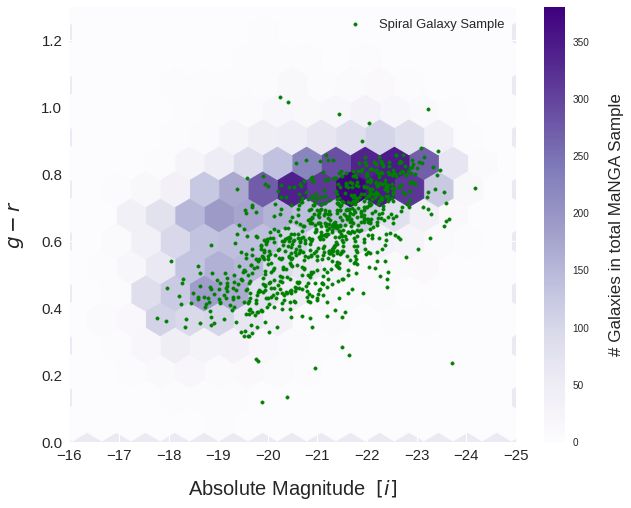

In [30]:
plt.figure(figsize=(10, 8))

hb = plt.hexbin(filt_x1, filt_y1, gridsize=15, cmap=plt.get_cmap('Purples'))
plt.scatter(imag_array[sample_indices], np.subtract(gmag_array, rmag_array)[sample_indices], marker = '.',
            label='Spiral Galaxy Sample', color='green')

cb = plt.colorbar(hb)
cb.set_label('# Galaxies in total MaNGA Sample', size=17, labelpad=20)
#plt.scatter(imag_array[non_sample_indices], np.subtract(gmag_array, rmag_array)[non_sample_indices], marker='x',
#            label='Total MaNGA Sample')

plt.xlim(-16, -25)
plt.ylim(0, 1.3)

plt.xlabel('Absolute Magnitude  $[i]$', size=20, labelpad = 15)
plt.ylabel('$g - r$', size=20, labelpad = 15)

plt.xticks(size=15)
plt.yticks(size=15)

plt.legend(fontsize=13)

In [31]:
mass_array_lg = np.log10(mass_array)

[WARNING]: invalid value encountered in log10 (RuntimeWarning)


In [42]:
x2 = mass_array_lg[non_sample_indices]
y2 = z_array[non_sample_indices]

In [43]:
filt_x2 = x2.copy()
filt_y2 = y2.copy()

indices2del2 = []

for i in range(len(x2)):
    if (x2[i] > 12) or (x2[i] < 8) or (y2[i] > 0.16) or (y2[i] < 0):
        indices2del2.append(i)

In [44]:
len(indices2del2)

1046

In [45]:
filt_x2 = np.delete(filt_x2, indices2del2)
filt_y2 = np.delete(filt_y2, indices2del2)

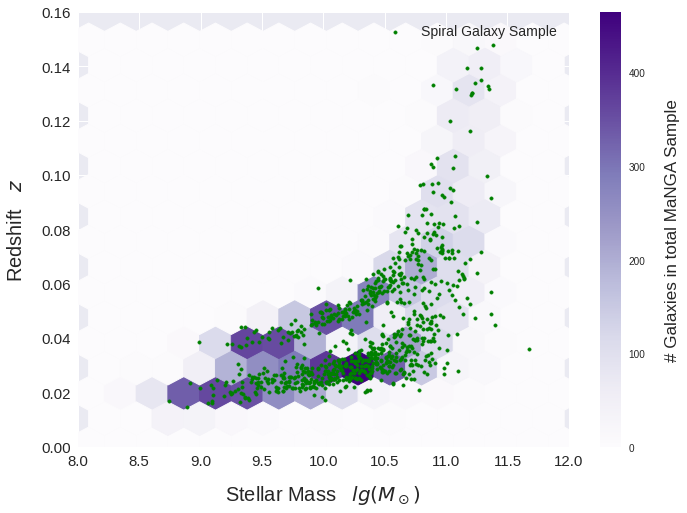

In [51]:
plt.figure(figsize=(11, 8))

hb = plt.hexbin(filt_x2, filt_y2, gridsize=15, cmap=plt.get_cmap('Purples'))
#plt.scatter(mass_array_lg[non_sample_indices], z_array[non_sample_indices], marker='x',
#            label='Total MaNGA Sample')
plt.scatter(mass_array_lg[sample_indices], z_array[sample_indices], marker = '.',
            label='Spiral Galaxy Sample', color='green')

cb = plt.colorbar(hb)
cb.set_label('# Galaxies in total MaNGA Sample', size=17, labelpad=20)

plt.xlim(8, 12)
plt.ylim(0, 0.16)

plt.xlabel('Stellar Mass   $lg(M_\odot)$', size=20, labelpad = 15)
plt.ylabel('Redshift   $z$', size=20, labelpad = 15)

plt.xticks(size=15)
plt.yticks(size=15)

plt.legend(fontsize=14)